In [192]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense, Dropout
from keras.utils import np_utils, to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [15,28]

In [2]:
# wczytaj dane i odrzuć wiersze, w których występuje NaN (nie ma shot_made_flag)
data=pd.read_csv("../data/data.csv")
print(data.shape)
data.dropna(inplace=True)
print(data.shape)
print(data.columns)

(30697, 25)
(25697, 25)
Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')


In [175]:
X = data[["loc_x", "loc_y"]]
y = data[["shot_made_flag"]]
XX = np.array(X)
yy = np.array(y)
3
yy = to_categorical(yy)
cnt = 1000
behind = np.concatenate((np.random.randint(-300, 300, (cnt,1)), np.random.randint(-100, -50, (cnt,1))), axis=1)
behindy = np.array([[1.0,0.0]]*cnt)
newX = np.concatenate((XX, behind))
newy = np.concatenate((yy, behindy))
p = np.random.permutation(len(newy))
newX = newX[p]
newy = newy[p]
print(newX)
print(newy)


[[ 231   30]
 [-106  129]
 [-149  198]
 ...
 [  80   63]
 [   0    0]
 [ 159  210]]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [193]:
model = Sequential()

model.add(Dense(100, input_dim=2, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(100, input_dim=2, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(2, activation="softmax"))

model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [195]:
model.fit(newX, newy, epochs=5, batch_size=32, validation_split=0.2)

Train on 21357 samples, validate on 5340 samples
Epoch 1/5
21357/21357 [==============================] - 3s 149us/step - loss: 0.7526 - acc: 0.6085 - val_loss: 0.7286 - val_acc: 0.6109
Epoch 2/5
21357/21357 [==============================] - 3s 145us/step - loss: 0.7179 - acc: 0.6137 - val_loss: 0.7039 - val_acc: 0.6094
Epoch 3/5
21357/21357 [==============================] - 3s 145us/step - loss: 0.6931 - acc: 0.6194 - val_loss: 0.6832 - val_acc: 0.6103
Epoch 4/5
21357/21357 [==============================] - 3s 146us/step - loss: 0.6775 - acc: 0.6234 - val_loss: 0.6714 - val_acc: 0.6148
Epoch 5/5
21357/21357 [==============================] - 3s 144us/step - loss: 0.6658 - acc: 0.6245 - val_loss: 0.6627 - val_acc: 0.6092


In [63]:
t = np.array(XX)
print(t)
print(t.shape)
model.predict(t)

[[-157    0]
 [-101  135]
 [ 138  175]
 ...
 [-134  166]
 [  31  267]
 [   1   72]]
(25697, 2)


array([[0.43218106, 0.56781894],
       [0.56280947, 0.43719044],
       [0.5996825 , 0.4003175 ],
       ...,
       [0.57862806, 0.4213719 ],
       [0.63602996, 0.36397   ],
       [0.46611118, 0.5338889 ]], dtype=float32)

In [183]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min = -300
    x_max = 300
    y_min = -100
    y_max = 800
    h = 10
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:,0].reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, levels=20)
    plt.show()

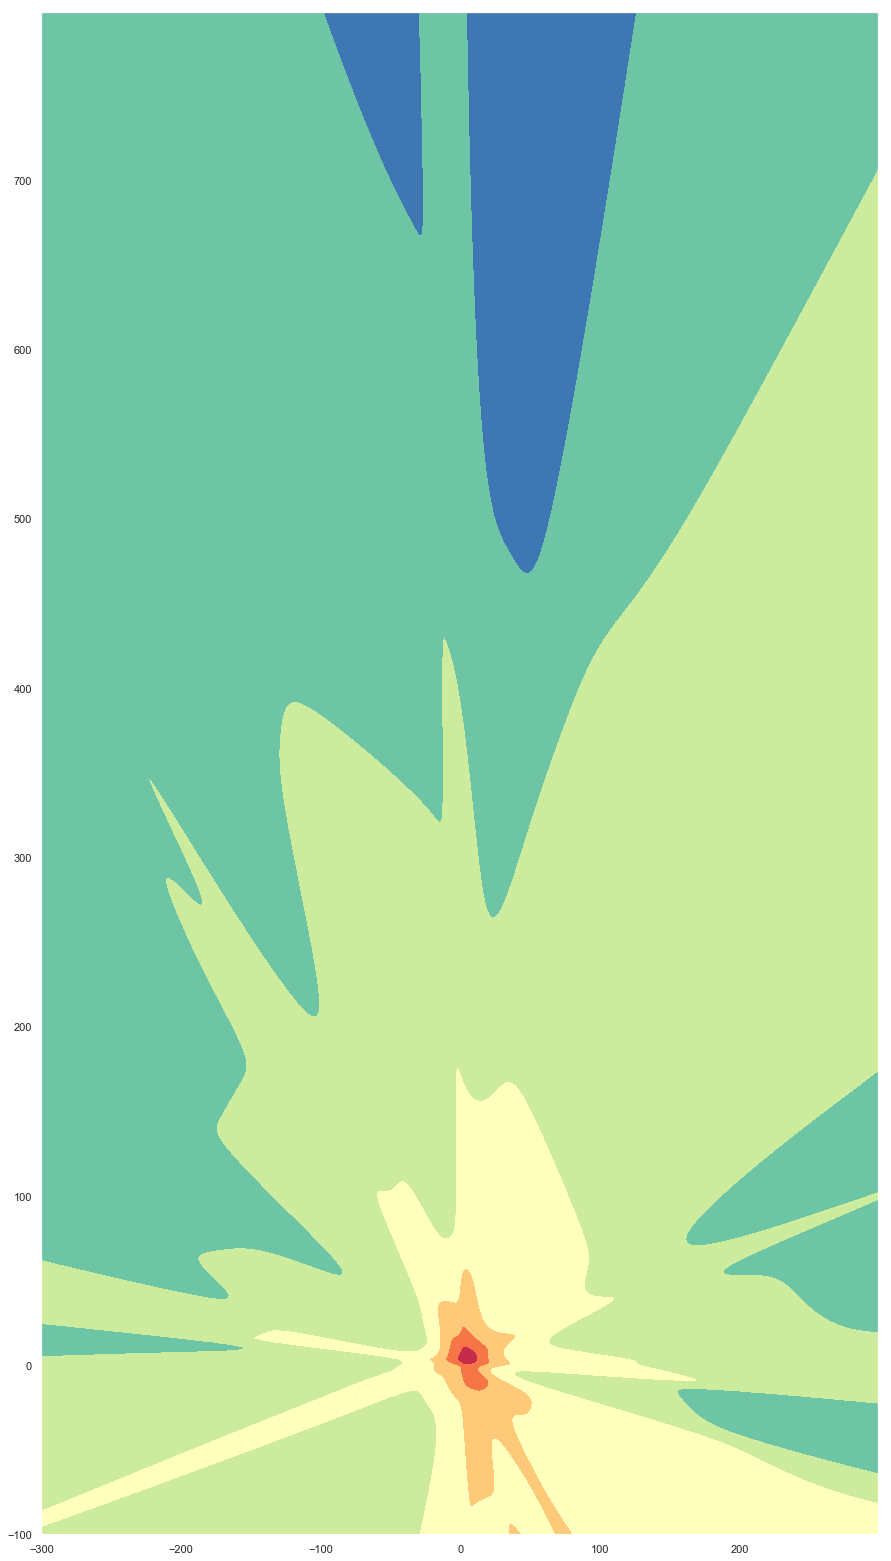

In [110]:
plot_decision_boundary(model.predict)

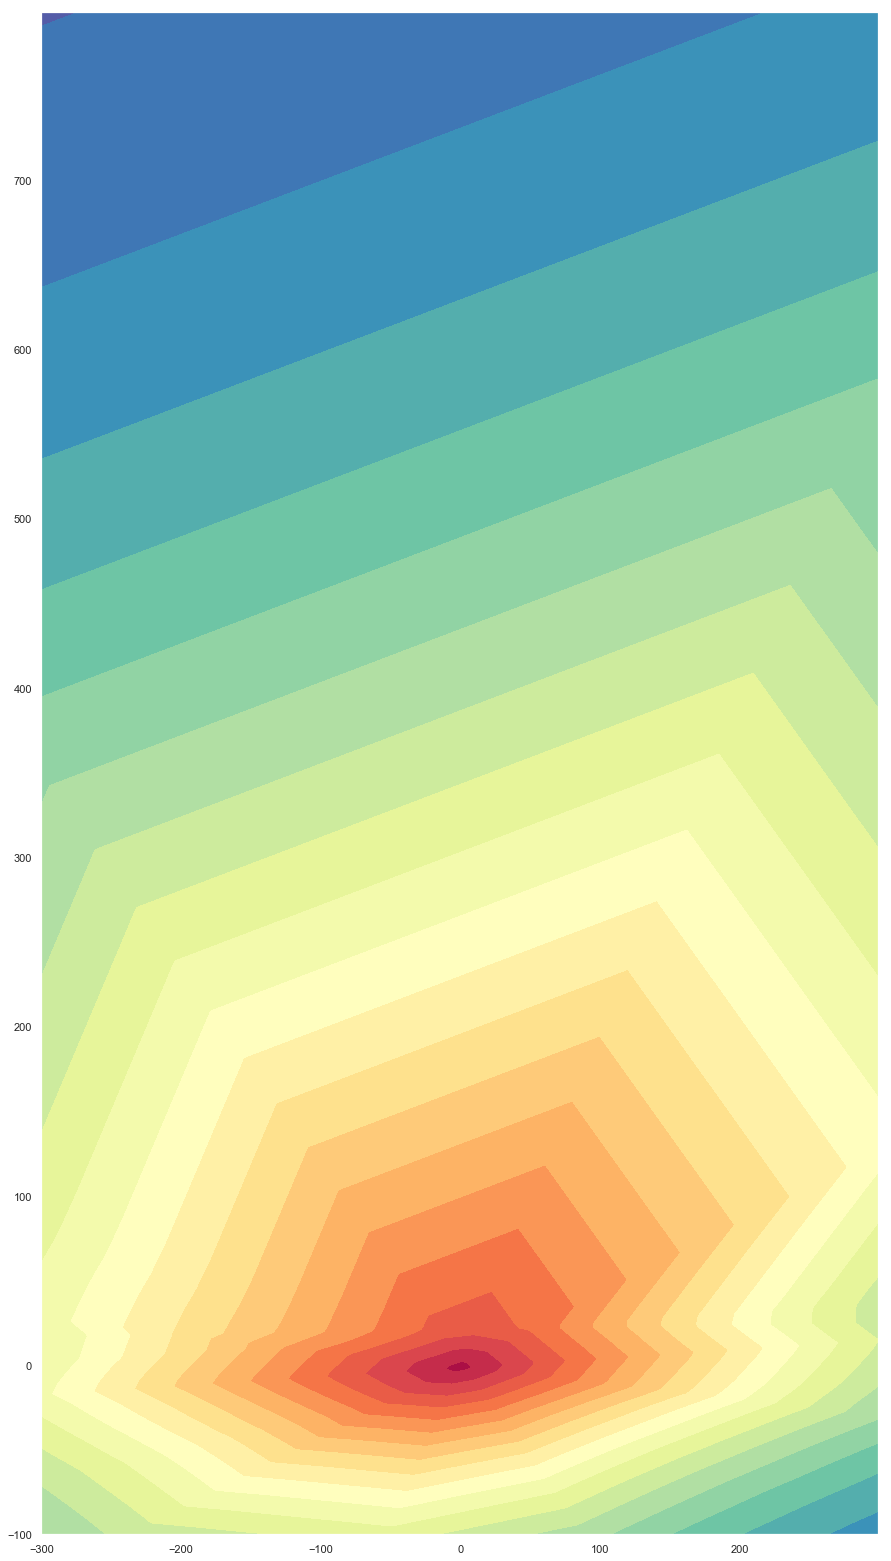

In [151]:
plot_decision_boundary(model.predict)

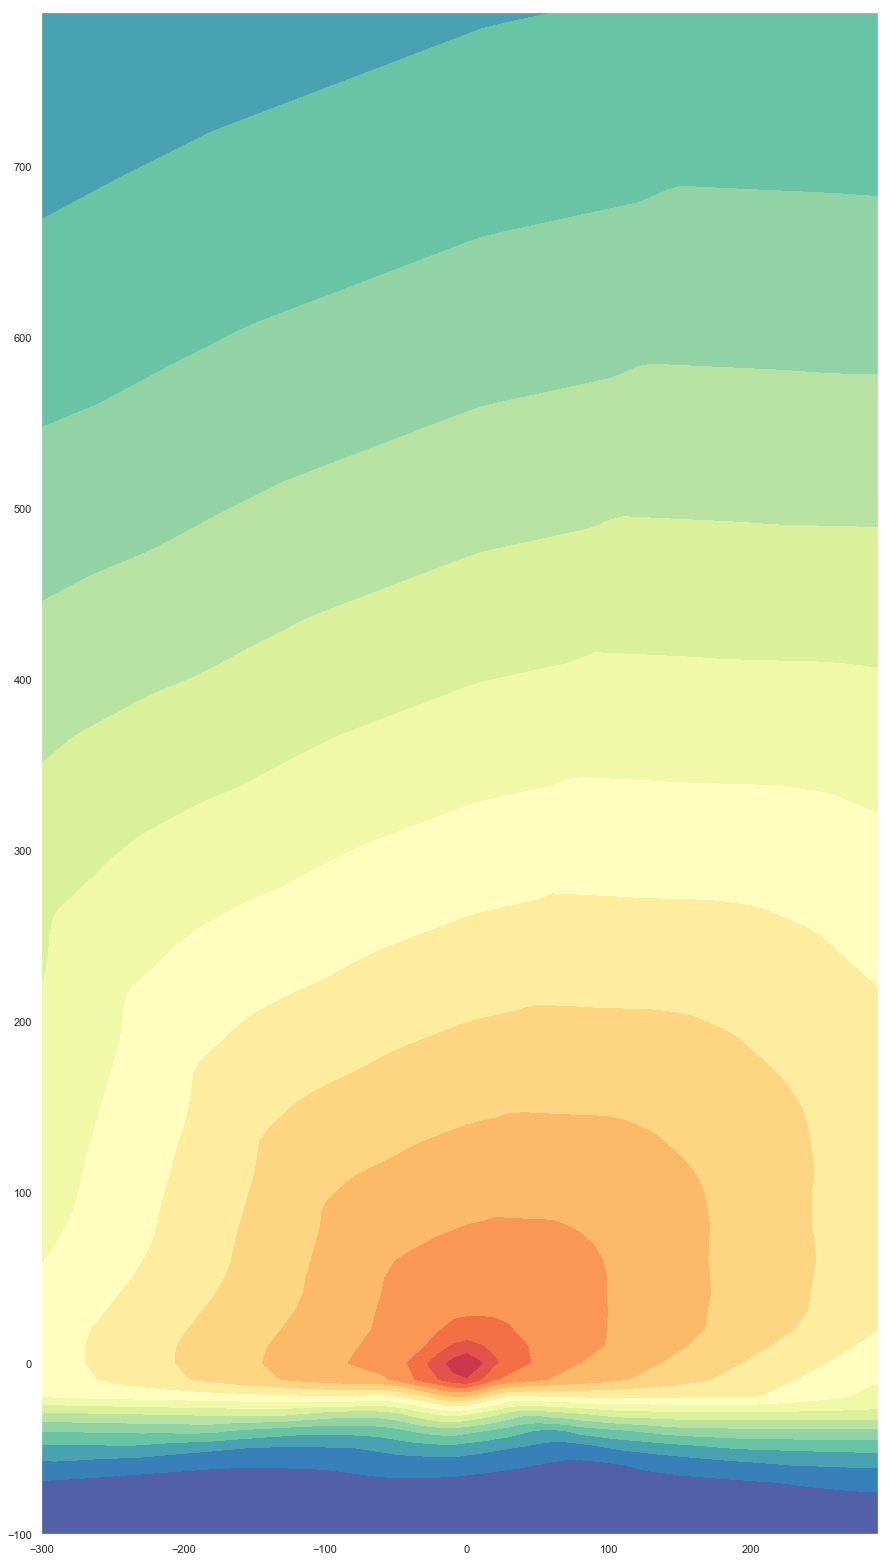

In [196]:
plot_decision_boundary(model.predict)